In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Python
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("bank-full.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Univariate analysis for categorical and object variables

In [4]:
# Univariate analysis of categorical and object variables

def plot_object(dataframe, column_name):
 """
 Plots a bar chart showing category frequencies with both frequency (inside bar)
 and proportion (above bar) labels.
 Parameters:- dataframe: pandas DataFrame- column_name: str, name of the categorical column to visualize
 """
 # Count frequencies and proportions
 value_counts = dataframe[column_name].value_counts()
 proportions = value_counts / len(dataframe)
 # Set plot style
 sns.set(style="whitegrid")
 plt.figure(figsize=(10, 6))
 # Bar plot
 palette1=sns.color_palette(palette='tab20')
 ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette=palette1)
 # Annotate bars
 for i, (count, prop) in enumerate(zip(value_counts.values, proportions.values)):
 # Frequency inside bar
   ax.text(i, count * 0.5, f'{count}', ha='center', va='center',fontsize=11, color='black', fontweight='bold')
 # Proportion above bar
   ax.text(i, count + max(value_counts.values) * 0.02, f'{prop:.2%}',ha='center', fontsize=10, color='black')
 plt.title(f'Distribution of {column_name}')
 plt.xlabel(column_name)
 plt.xticks(rotation=90)
 plt.ylabel('Frequency') 
 plt.tight_layout()
 plt.show()

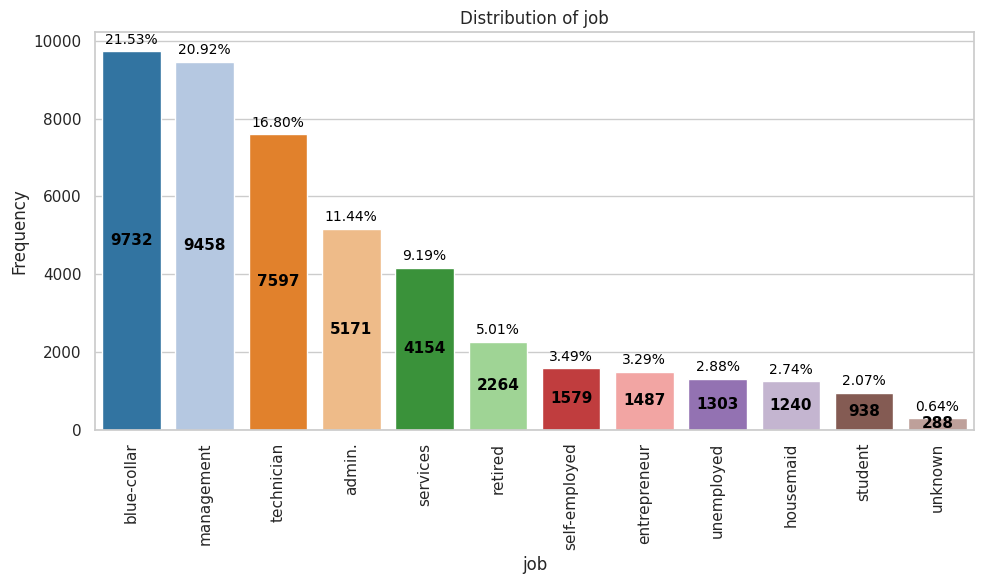

In [5]:
plot_object(df, "job")

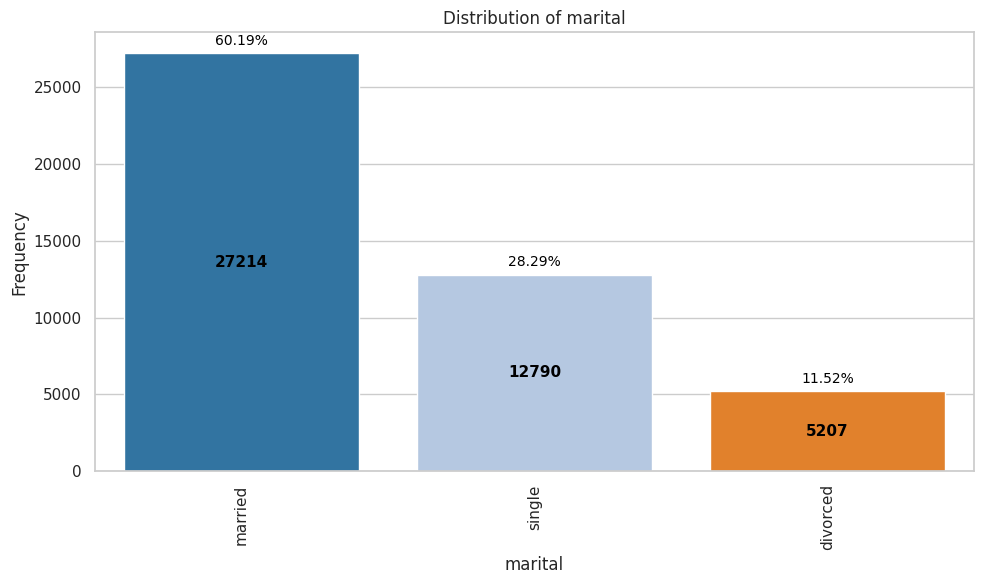

In [6]:
plot_object(df, 'marital')

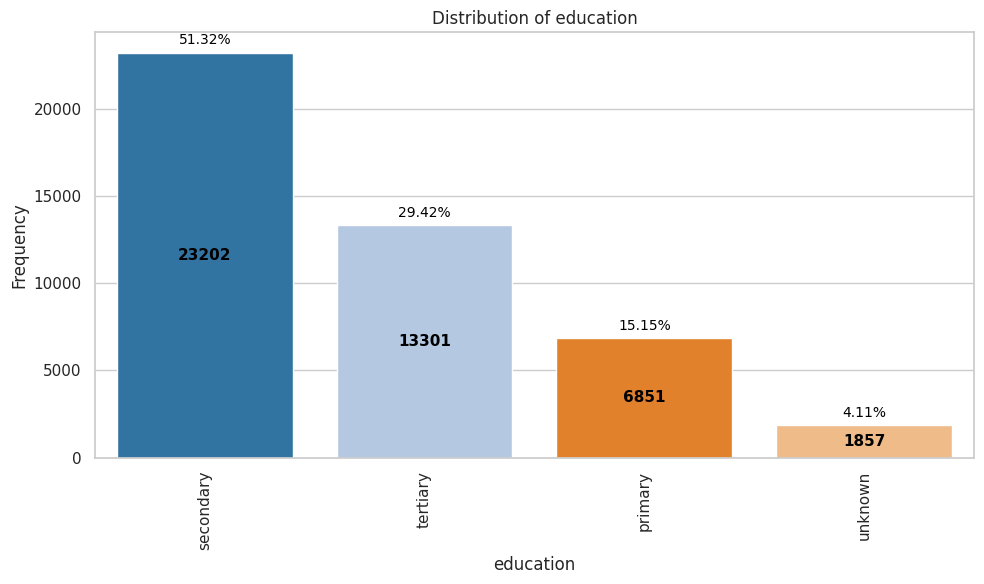

In [7]:
plot_object(df, 'education')

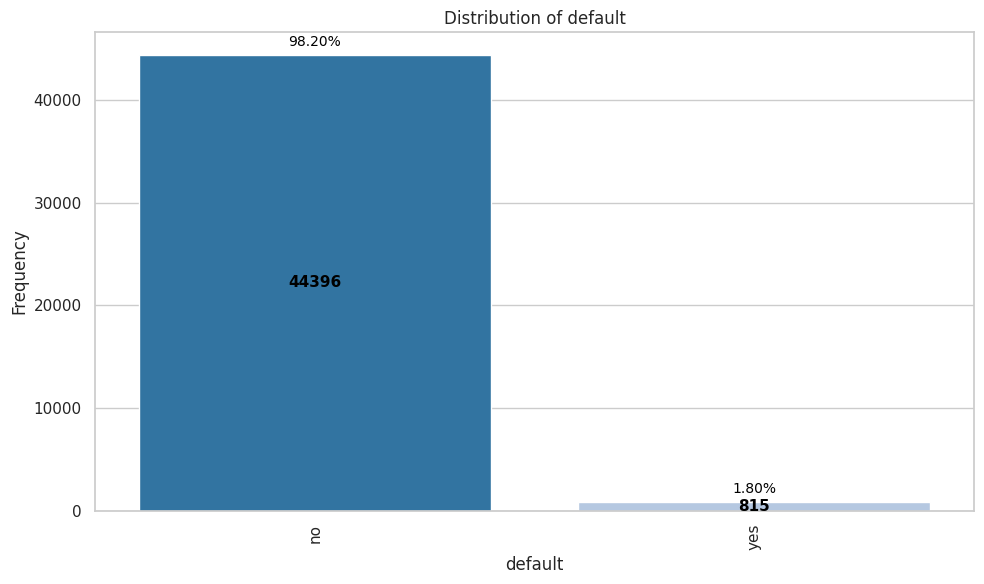

In [8]:
plot_object(df, 'default')

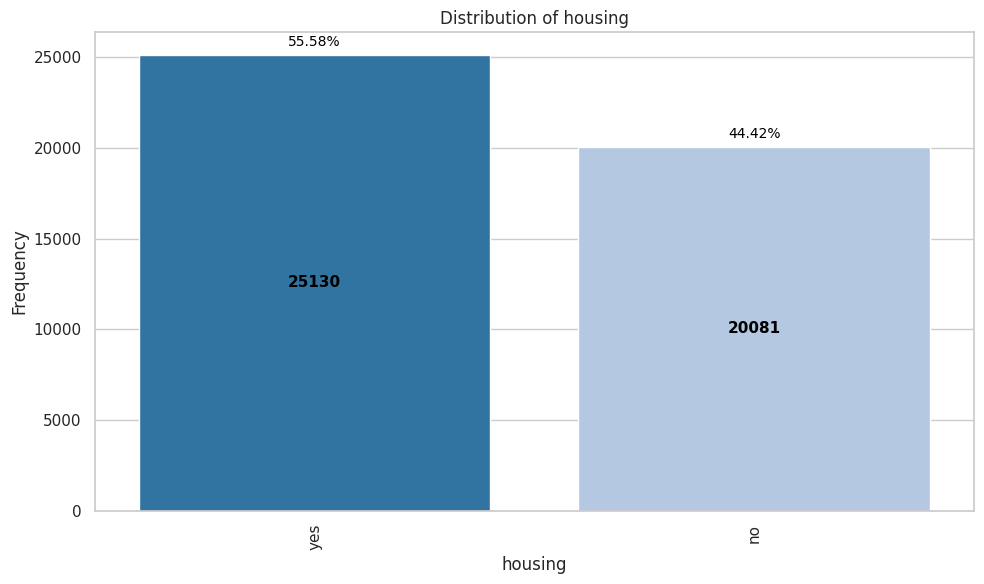

In [9]:
plot_object(df, 'housing')

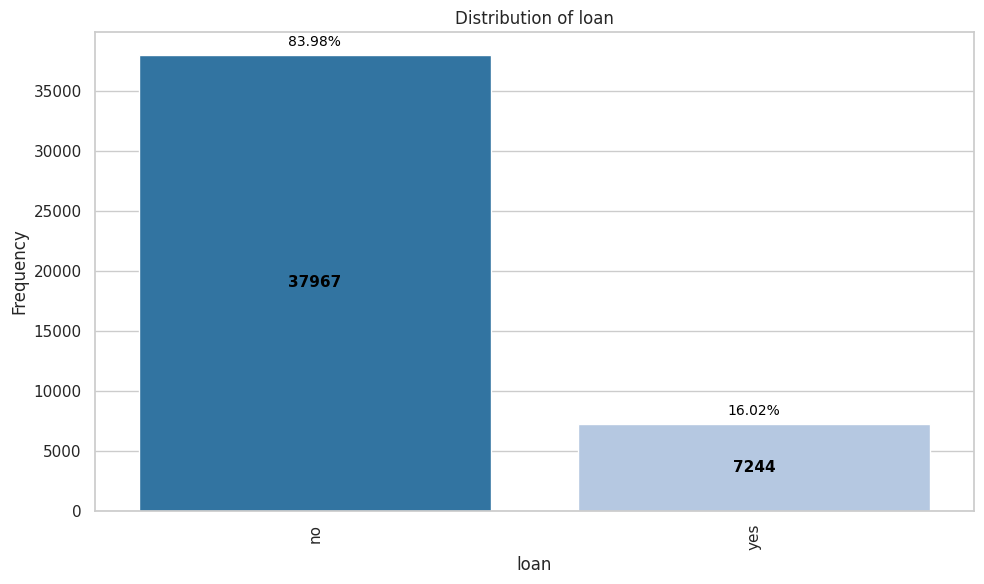

In [10]:
plot_object(df, 'loan')

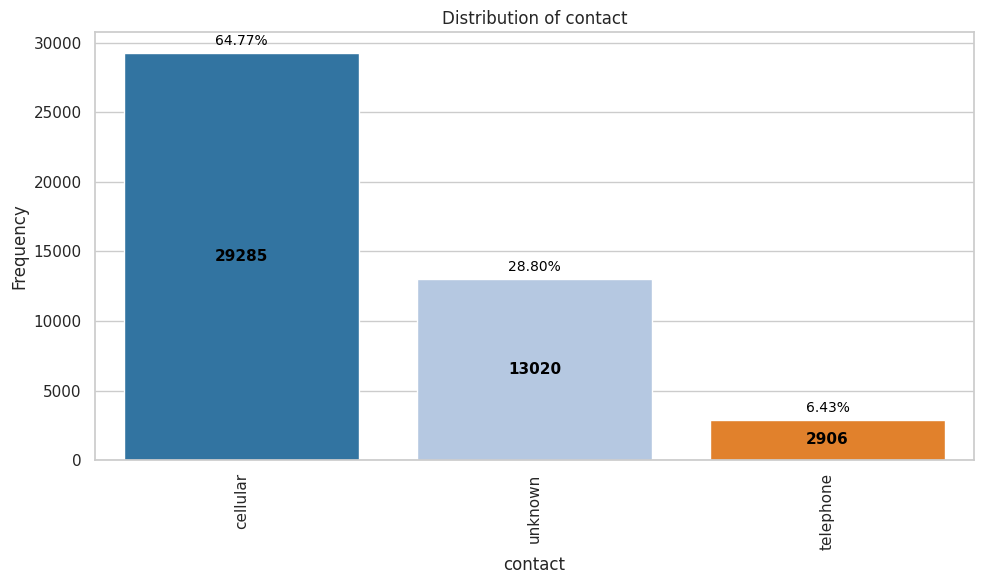

In [11]:
plot_object(df, 'contact')

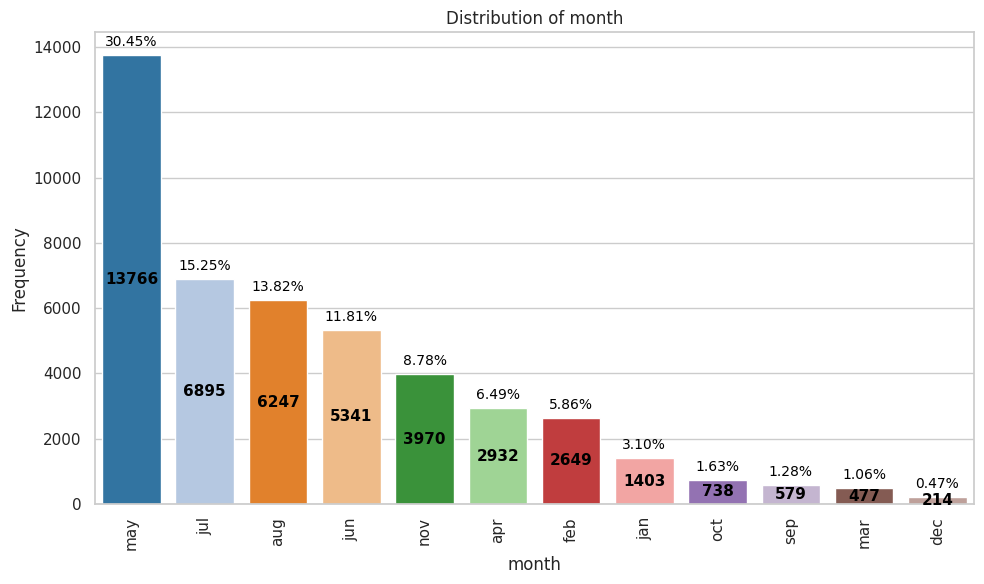

In [12]:
plot_object(df, 'month')

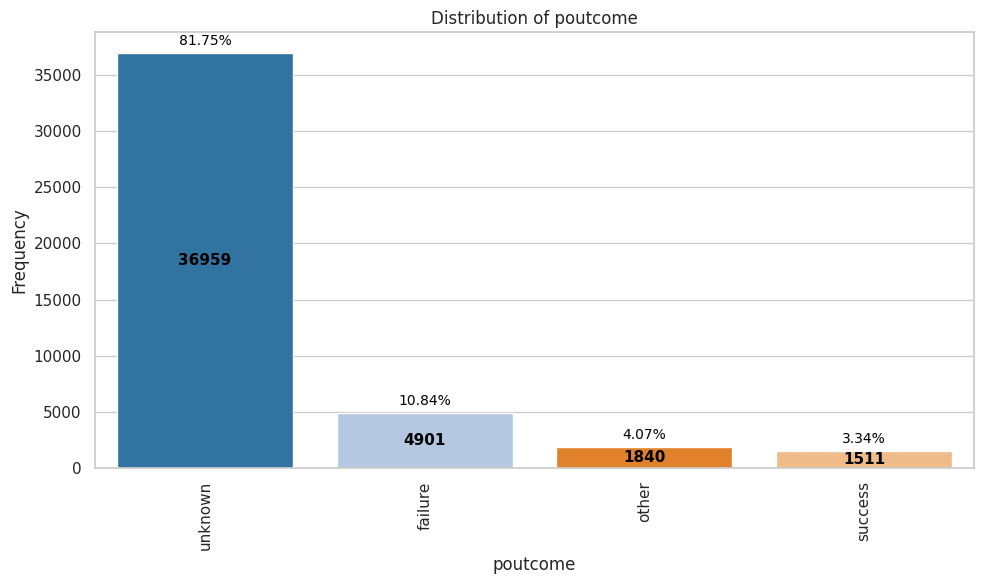

In [13]:
plot_object(df, 'poutcome')

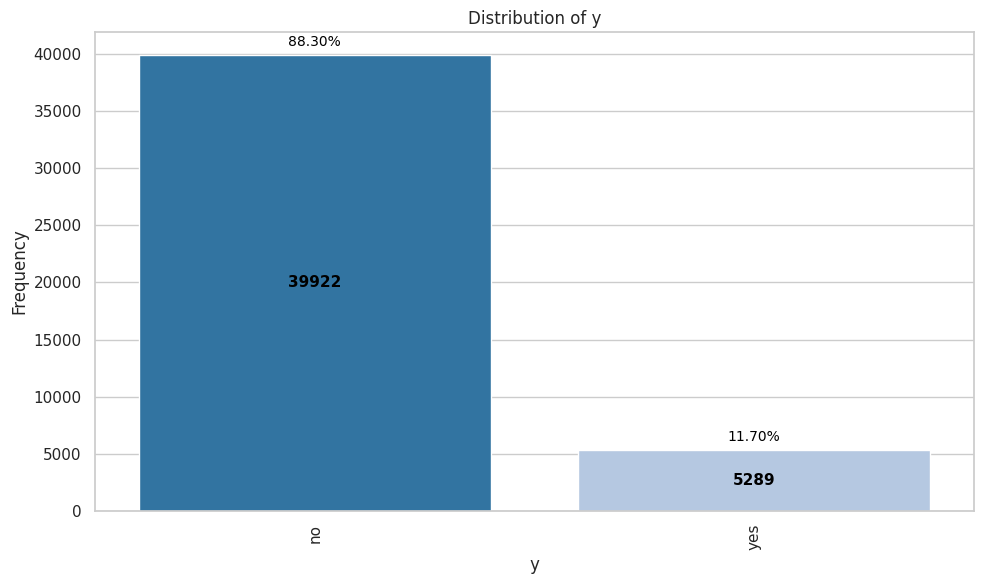

In [14]:
plot_object(df, 'y')

## Univariate Analysis for numerical variables

In [15]:
# univariate analysis of continuous variables
def cont_plot(df, var):
 #var="Age"
 # Set plot style
 sns.set(style="whitegrid")
 # Create a figure with two subplots: histogram and box plot
 plt.figure(figsize=(12, 6))
 # Histogram
 # Box plot
 plt.subplot(1, 2, 1)
 sns.histplot(df[var], bins=20, kde=True, color='red')
 plt.title(var+' Distribution- Histogram')
 plt.xlabel(var)
 plt.ylabel('Frequency')
 plt.subplot(1, 2, 2)
 sns.boxplot(x=df[var], color='yellow')
 plt.title(var+' Distribution- Box Plot')

In [16]:
def NoOutlier(df,var):
    sns.boxplot(x=df[var], showfliers=False,color="yellow")
    plt.title("Boxplot of "+ var +" (without outliers)")
    plt.show()


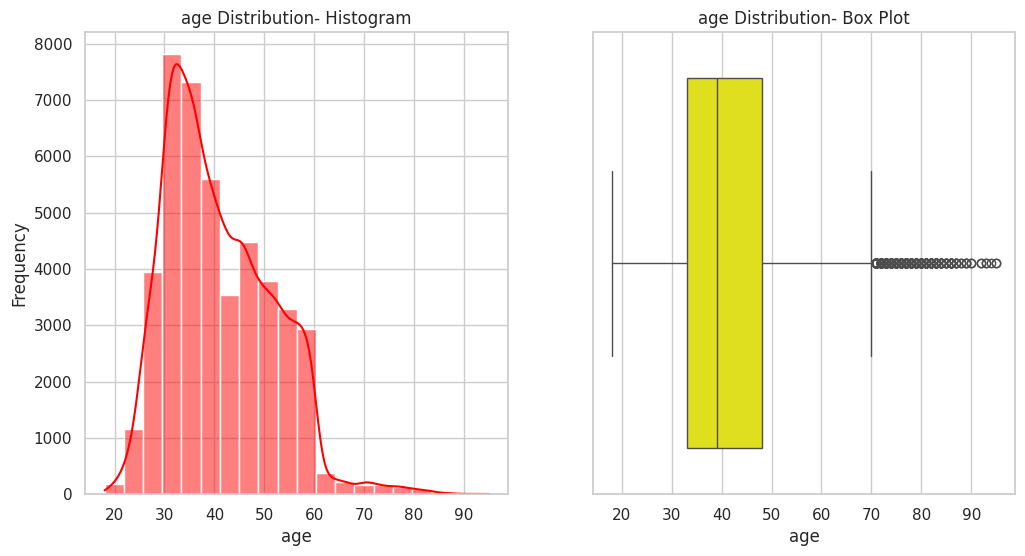

In [17]:
cont_plot(df,'age' )

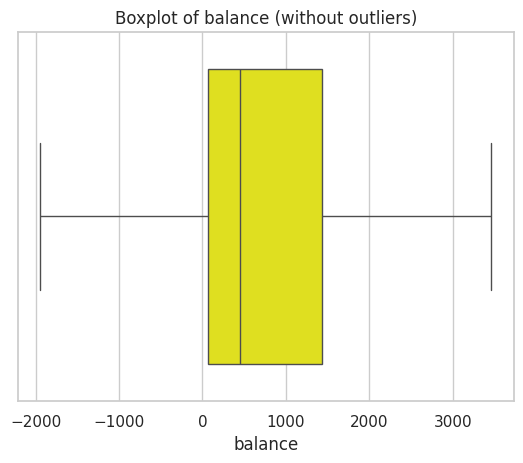

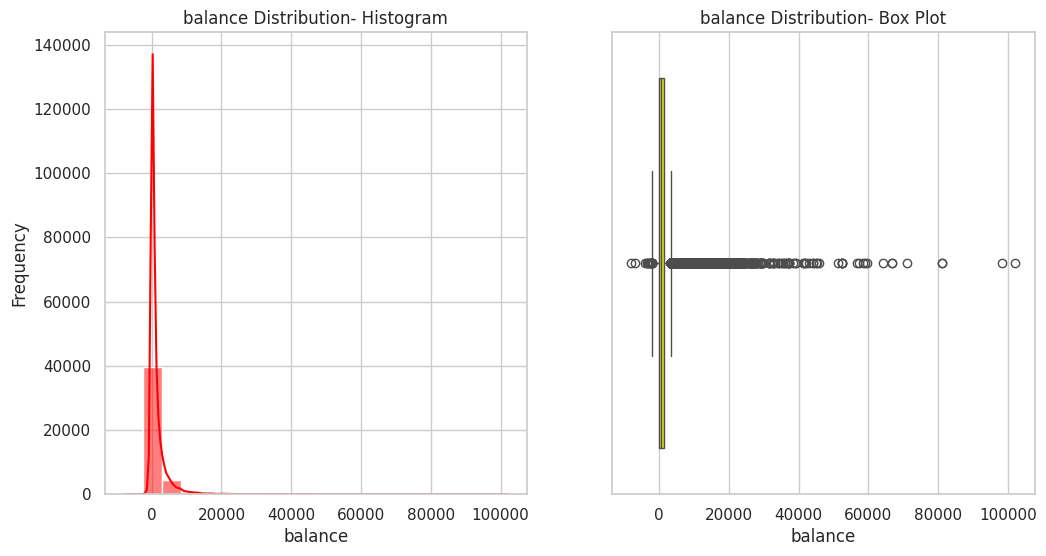

In [18]:
# Boxplot without outliers
NoOutlier(df,"balance")
cont_plot(df,'balance' )

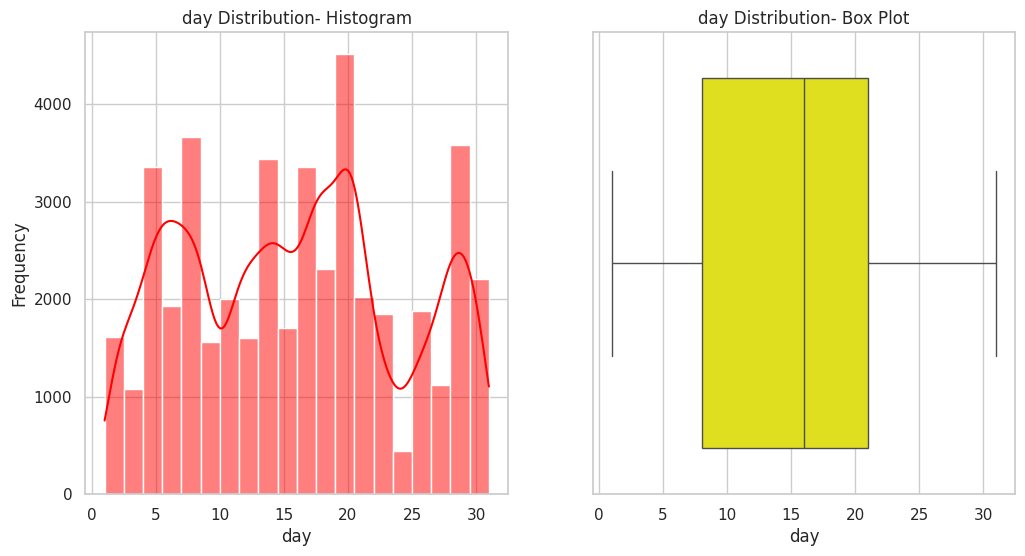

In [19]:
cont_plot(df,'day' )

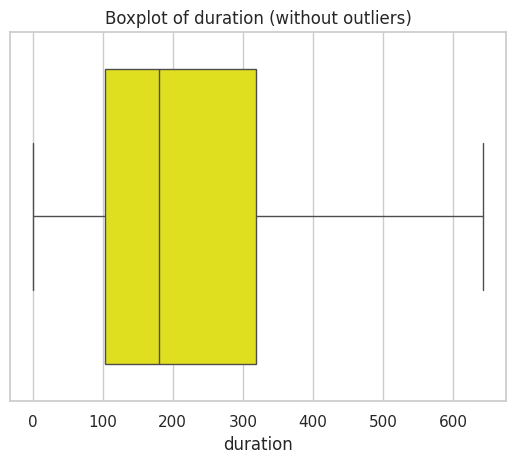

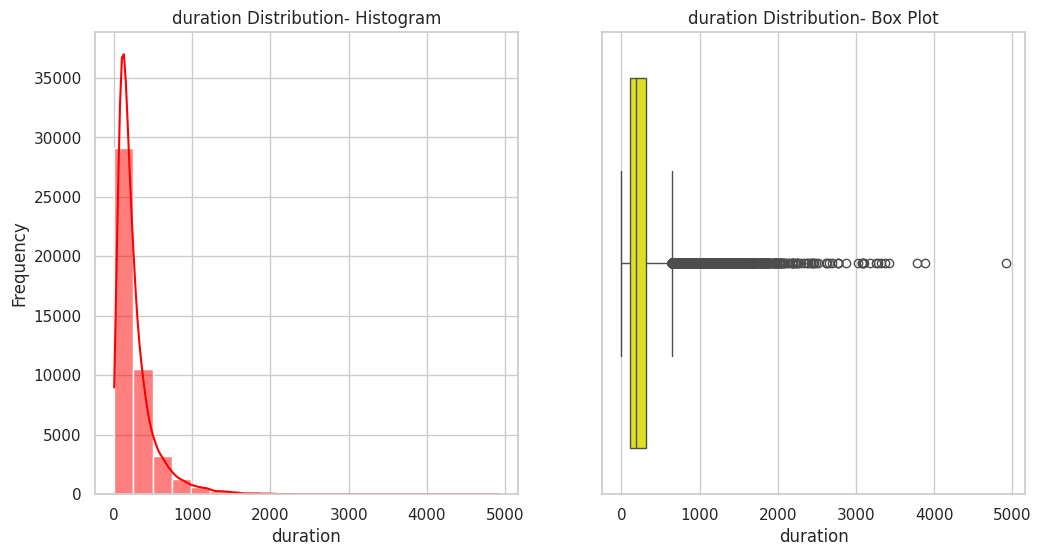

In [20]:
NoOutlier(df,"duration")
cont_plot(df,'duration' )

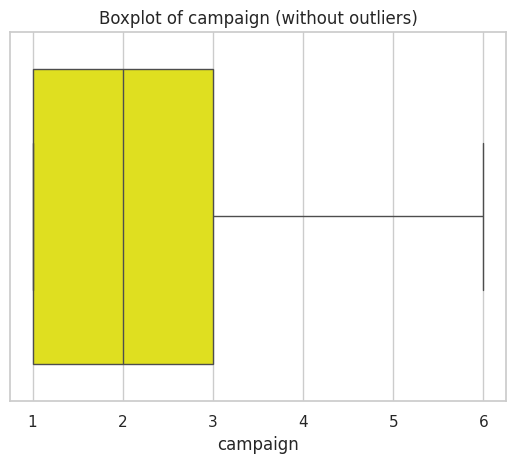

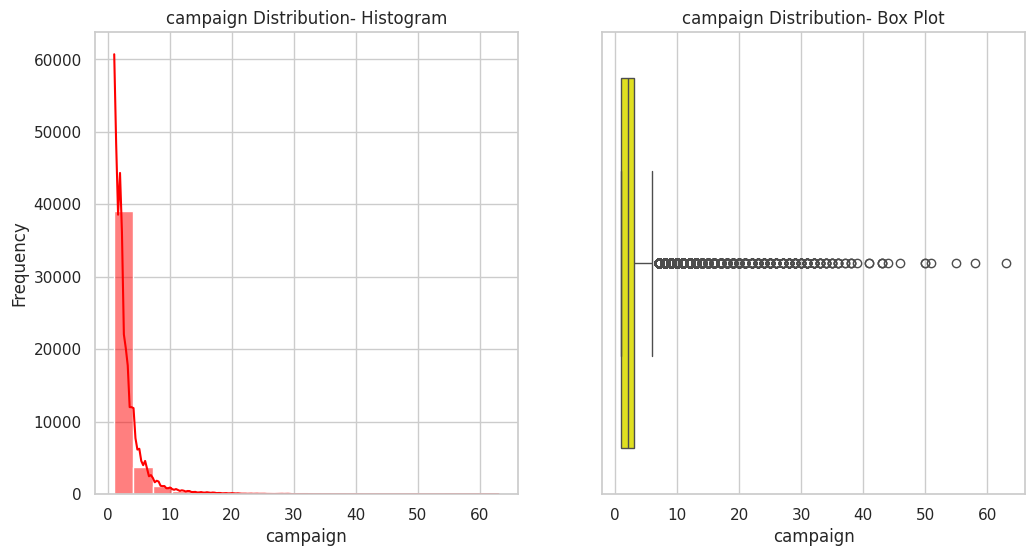

In [21]:
NoOutlier(df,"campaign")
cont_plot(df,'campaign' )

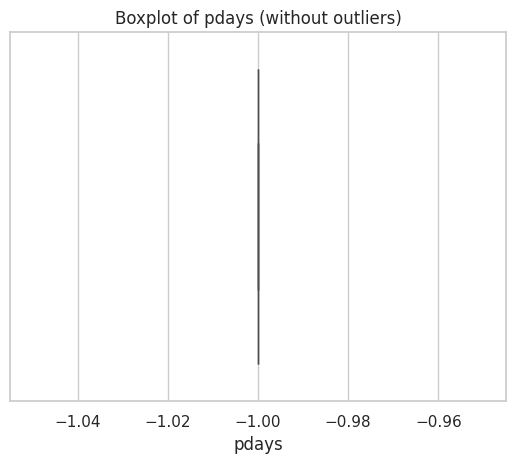

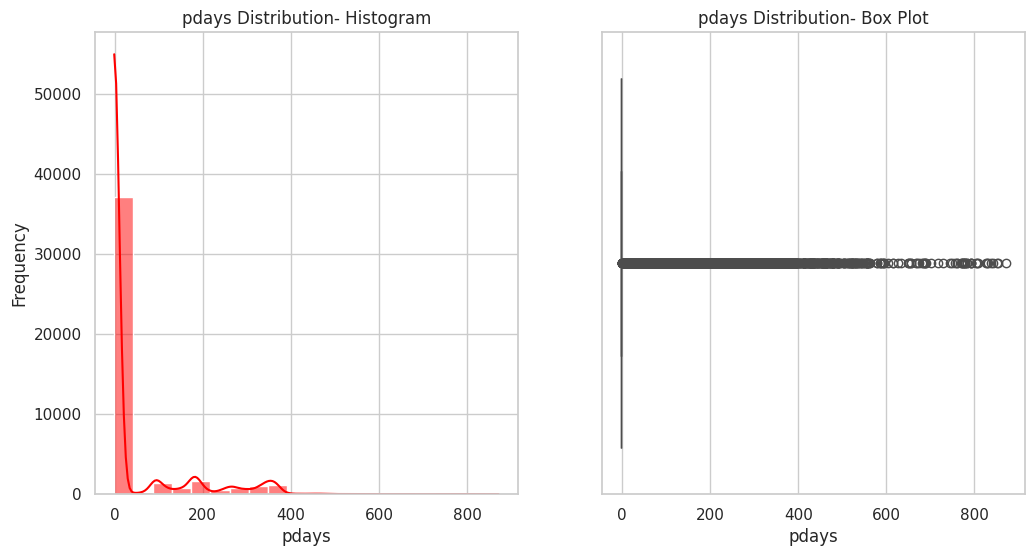

In [22]:
NoOutlier(df,"pdays")
cont_plot(df,'pdays' )

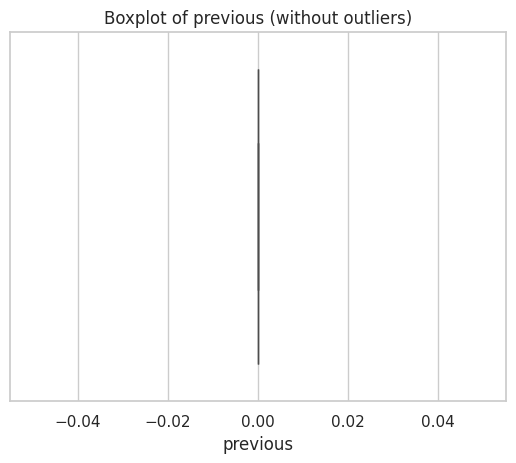

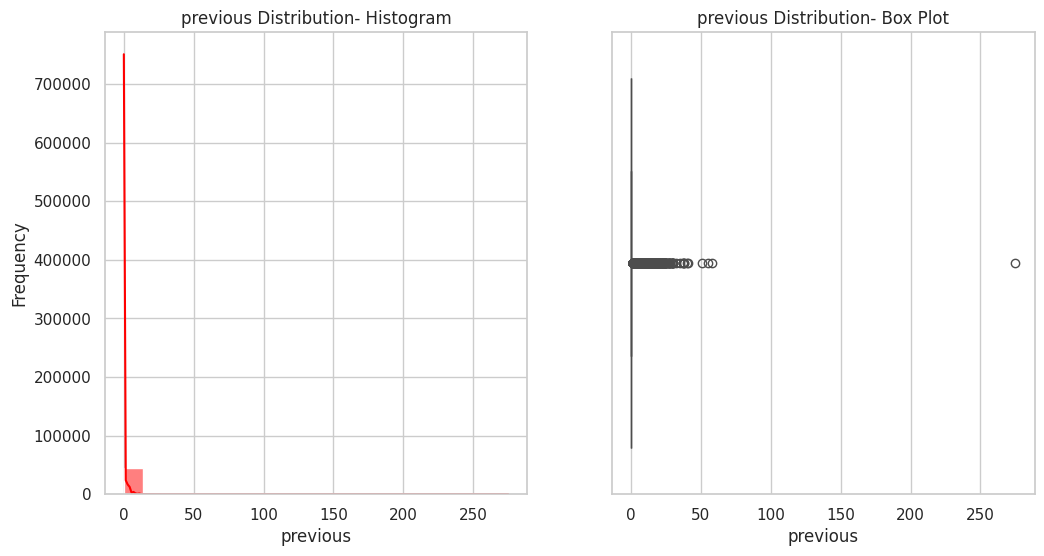

In [23]:
NoOutlier(df,"previous")
cont_plot(df,'previous' )

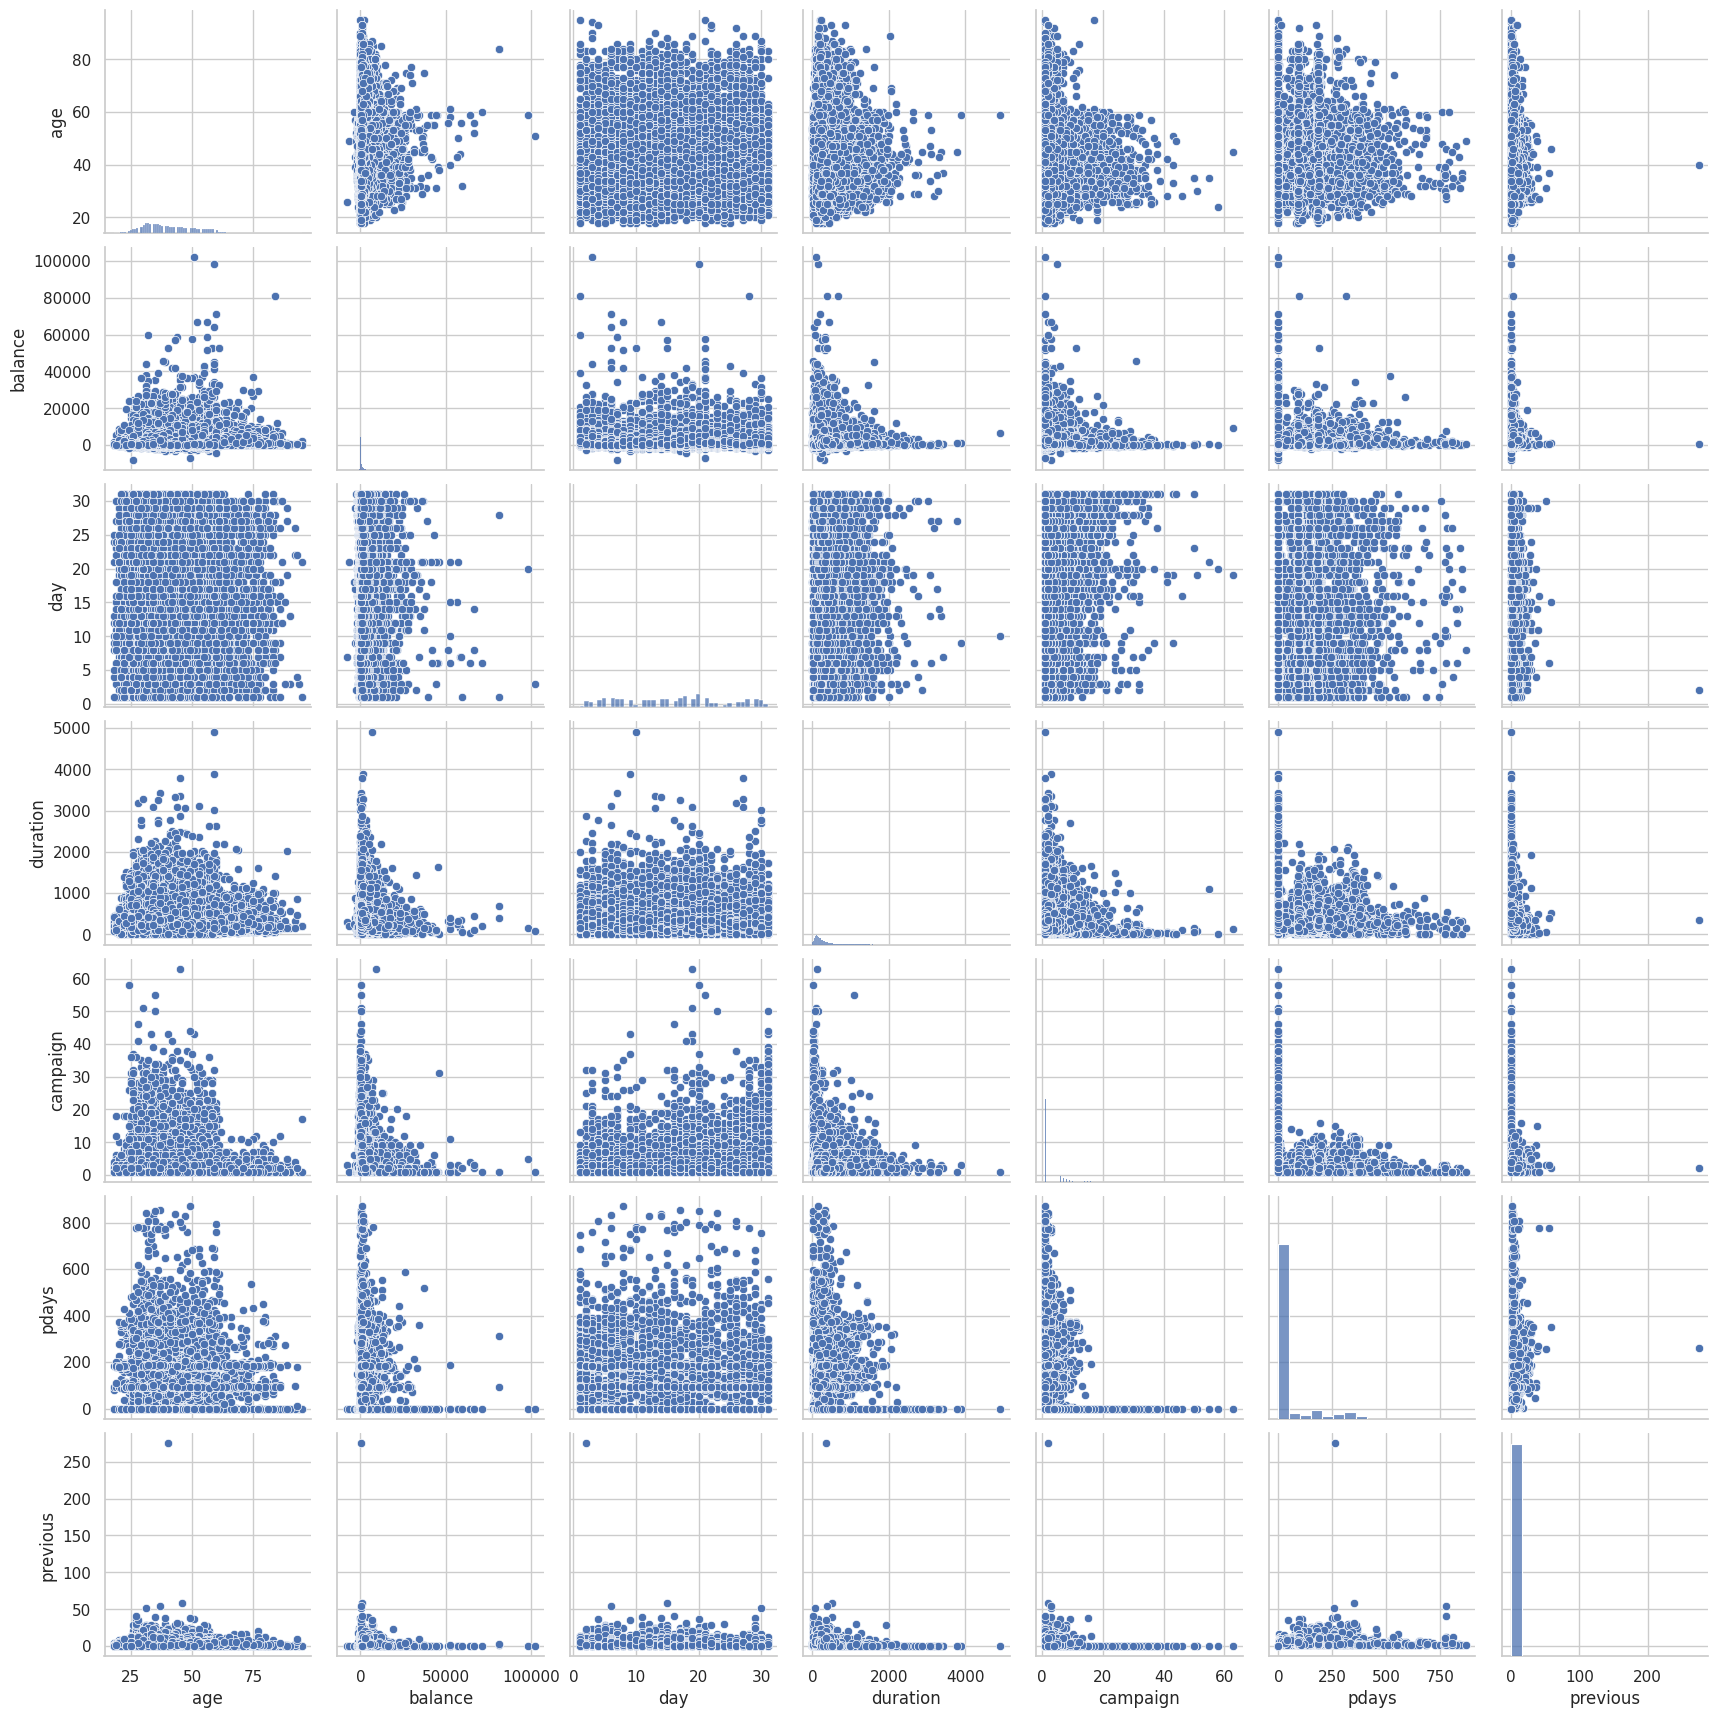

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairwise scatter plots for numerical variables
sns.pairplot(df.select_dtypes(include=['number']))
plt.show()


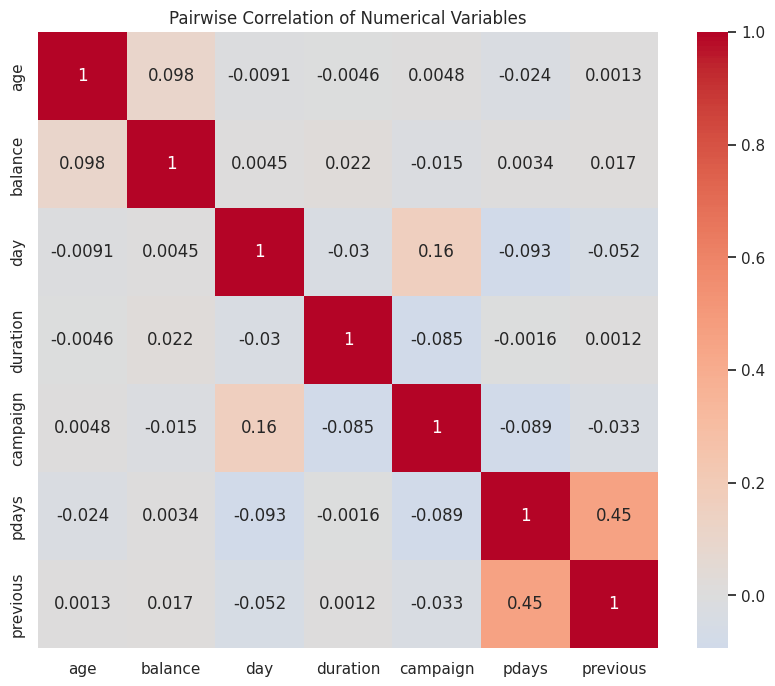

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.select_dtypes(include=['number']).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Pairwise Correlation of Numerical Variables")
plt.show()


In [26]:
int_columns = df.select_dtypes('int64').columns.tolist()

print(int_columns)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [27]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()

print(object_columns)


['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [42]:
def cat_cont_plot(df, xvar, yvar):
    """
    Creates histograms of a continuous variable across categories.
    
    Parameters:
    - df: pandas DataFrame
    - xvar: str, categorical column name (e.g. 'Target')
    - yvar: str, continuous column name (e.g. 'Age')
    """
    sns.boxplot(x=xvar, y=yvar, data=df, color="pink")
    plt.xticks(rotation=90)
    
    
    # Create a larger facet grid of histograms by category
    #g = sns.FacetGrid(df, col=xvar, col_wrap=4, height=6, aspect=0.5)  # Increased size and layout
    #g.map(sns.histplot, yvar, bins=20, color="green")

    # Add titles and labels
    #g.set_axis_labels(yvar, "Frequency")
    #g.set_titles(col_template="{col_name}")
   # plt.tight_layout()
    plt.show()

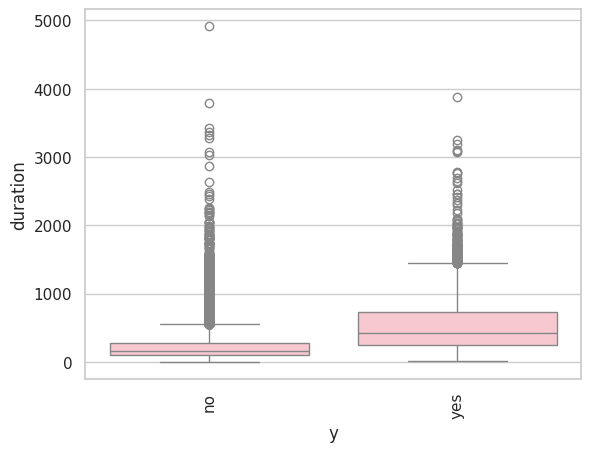

In [43]:
cat_cont_plot(df,"y", "duration")

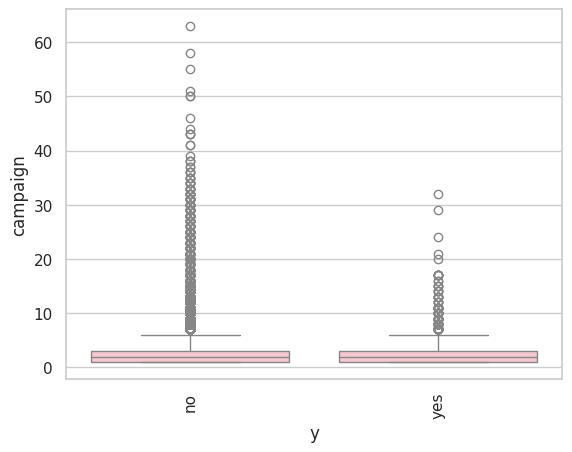

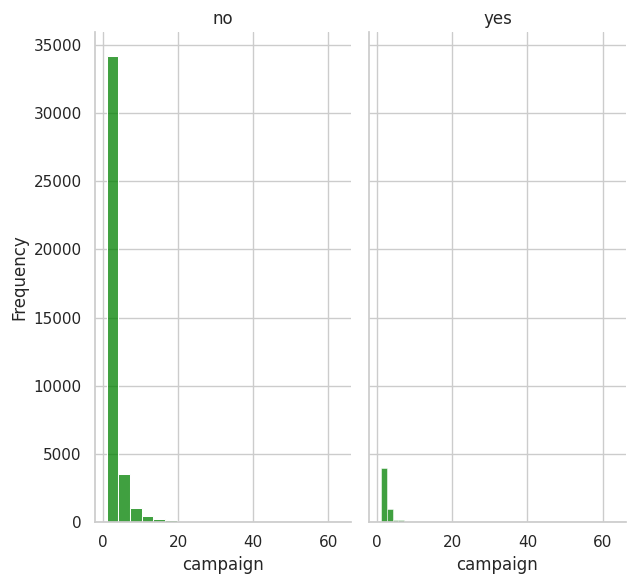

In [41]:
cat_cont_plot(df,"y", "campaign")

In [31]:
def cat_cat_plot(dataframe, column_name, hue_column):
    """
    Plots a grouped bar chart showing category frequencies split by hue,
    with both frequency (inside bar) and proportion (above bar) labels.
    
    Parameters:
    - dataframe: pandas DataFrame
    - column_name: str, name of the categorical column to visualize (x-axis)
    - hue_column: str, name of the second categorical variable to group by (hue)
    """
    # Count combinations of column and hue
    counts_df = dataframe.groupby([column_name, hue_column]).size().reset_index(name='count')
    total_counts = dataframe[column_name].value_counts()

    # Set plot style
    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 8))  # Larger frame

    # Create bar plot
    ax = sns.barplot(x=column_name, y='count', hue=hue_column, data=counts_df, palette="muted")
    # Annotate bars
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            x = bar.get_x() + bar.get_width() / 2
            category = bar.get_label()
            base_x = int(round(x))  # used for proportion lookup
            if height > 0:
                ax.text(x, height * 0.5, f'{int(height)}', ha='center', va='center',
                        fontsize=10, color='black', fontweight='bold')
                ax.text(x, height + max(counts_df['count']) * 0.02, f'{height / sum(container.datavalues):.1%}',
                        ha='center', fontsize=10, color='navy', fontweight='bold')


    # Beautify plot
    plt.title(f'{column_name} Distribution by {hue_column}', fontsize=16)
    plt.xlabel(column_name, fontsize=23)
    plt.ylabel('Frequency', fontsize=19)
    plt.xticks(rotation=45)
    plt.legend(title=hue_column)
    plt.tight_layout()
    plt.show()



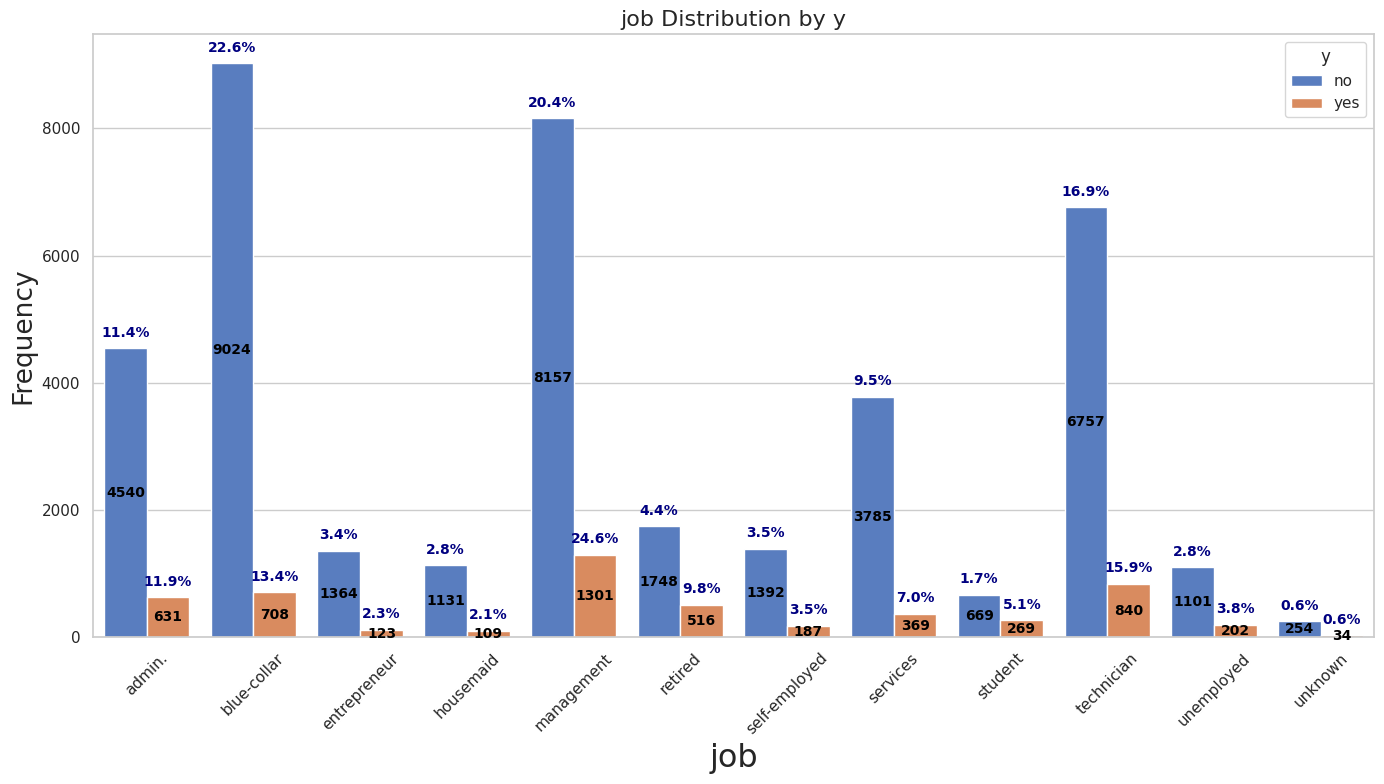

In [35]:
cat_cat_plot(df,'job',"y")

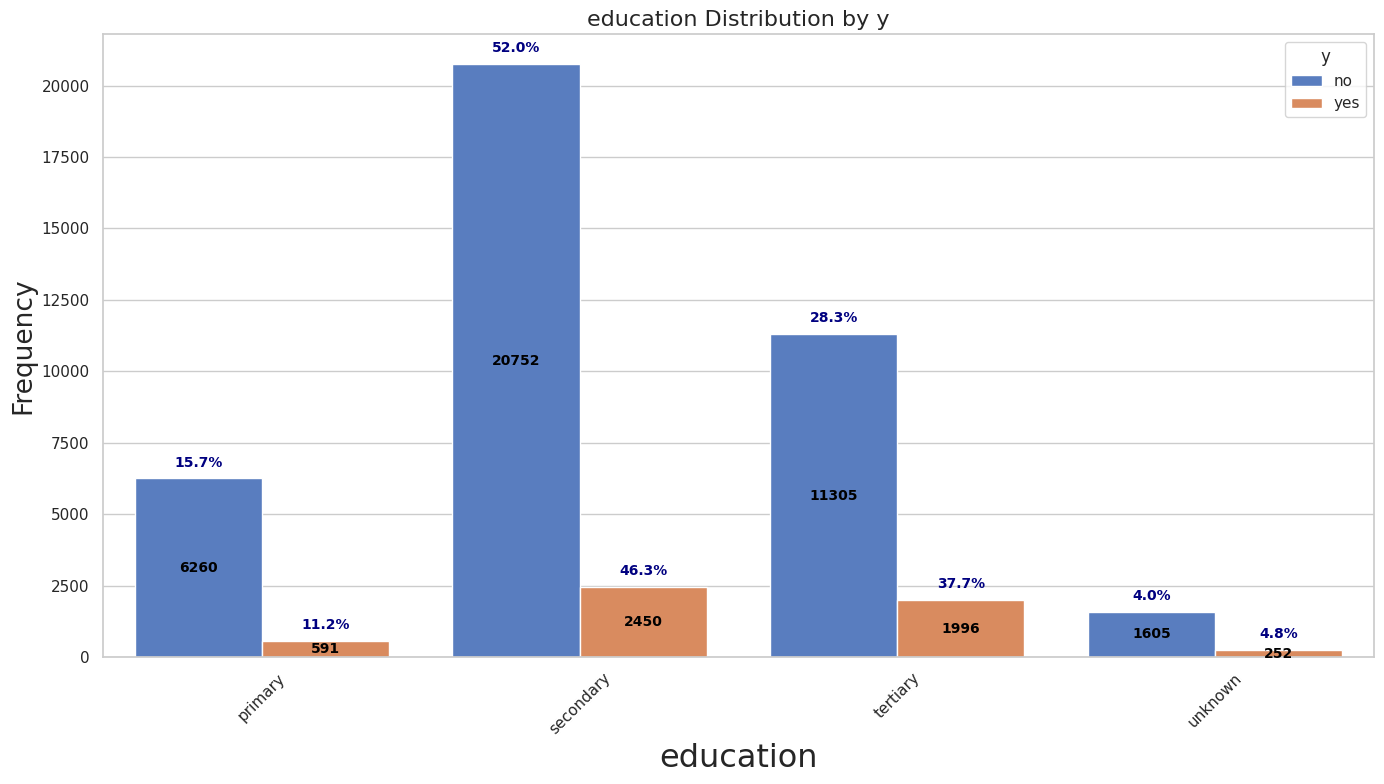

In [34]:
cat_cat_plot(df,'education',"y")